In [18]:
import os
import pickle
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from P02_MSIE.T11_refactor.vrptw_v12 import VRPTW

CURRENT_DIR = os.getcwd()
print(f"Current Directory: {CURRENT_DIR}")
datetime_now = datetime.now().strftime("%Y%m%d_%H%M%S")
os.makedirs(f"{CURRENT_DIR}/_tmp", exist_ok=True)


Current Directory: c:\Users\admin\Coding\research\rl-meta-test\src\P02_MSIE\T11_refactor


In [19]:
folder = "R_20251116_074824"
prefix = "sol"
it = 16282

In [20]:
with open(f"./saved_models/{folder}/{prefix}_{it:05d}_exp.pkl", "rb") as f:
    exp = pickle.load(f)
exp.tail()

,action,reward,done,idx_iteration,F,CR,MG,best_solution,convergence_rate,std_population,...,patience_remaining,F_sc,CR_sc,MG_sc,best_solution_sc,std_population_sc,best_trial_fitness_sc,std_trial_fitness_sc,patience_remaining_sc,TimeLimit.truncated
231,"[0.3768841028213501, -0.479238897562027, 0.475...",0.000273,False,2319,7.537682,0.020761,0.975637,291.174365,1.0,180.425350,...,50,0.376884,-0.479239,0.475637,0.291174,0.180425,0.291174,0.183811,0.25,False
232,"[0.45115506649017334, -0.44934797286987305, 0....",0.000166,False,2329,9.023101,0.050652,0.801211,291.174365,1.0,162.907496,...,40,0.451155,-0.449348,0.301211,0.291174,0.162907,0.291174,0.172540,0.20,False
233,"[0.44742655754089355, -0.4562608599662781, 0.3...",0.000101,False,2339,8.948531,0.043739,0.853611,291.174365,1.0,154.072855,...,30,0.447427,-0.456261,0.353611,0.291174,0.154073,0.328470,0.143196,0.15,False
234,"[0.4936739206314087, -0.47396865487098694, 0.3...",0.000061,False,2349,9.873478,0.026031,0.822008,291.174365,1.0,149.064964,...,20,0.493674,-0.473969,0.322008,0.291174,0.149065,0.330655,0.140652,0.10,False
235,"[0.4965967535972595, -0.42197468876838684, 0.3...",0.000037,False,2359,9.931935,0.078025,0.830107,291.174365,1.0,171.666798,...,10,0.496597,-0.421975,0.330107,0.291174,0.171667,0.326769,0.184313,0.05,False


In [21]:
with open(f"./saved_models/{folder}/{prefix}_{it:05d}_vrp.pkl", "rb") as f:
    info = pickle.load(f)

global_solution_history = info["global_solution_history"]
population = info["population"]
fitness_trial_history = info["fitness_trial_history"]
vrptw = info["vrptw"]
episode_reward = info["episode_reward"]
episode_length = info["episode_length"]
best_solution = info["best_solution"]
print(f"Episode Reward: {episode_reward}, Episode Length: {episode_length}, Best Solution: {best_solution}")

Episode Reward: 11.454117, Episode Length: 237, Best Solution: 291.1743654973095


In [22]:
global_solution_history

[662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,
 662.6204548352098,


Best global solution: 291.1743654973095


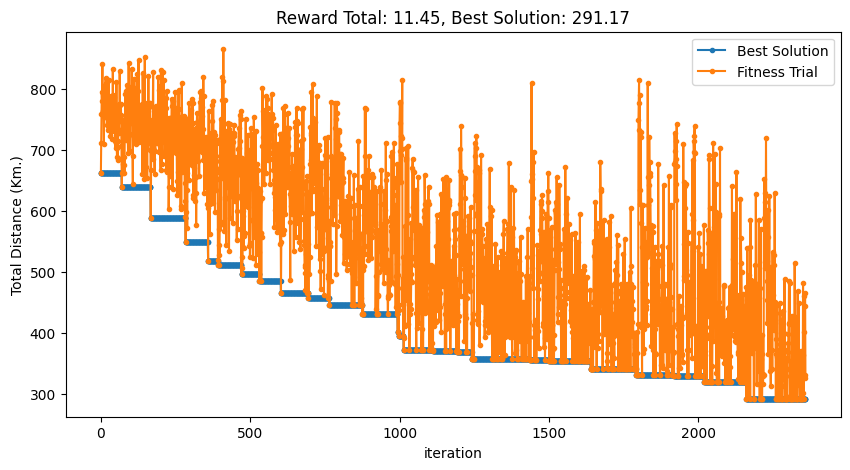

In [23]:
print(f"Best global solution: {min(global_solution_history)}")
# Plot results
fig, ax = plt.subplots(1, figsize=(10, 5))
x = np.arange(len(global_solution_history))
y1 = np.array(global_solution_history)
y2 = np.array(fitness_trial_history)
ax.plot(x, y1, marker=".", label="Best Solution")
ax.plot(x, y2, marker=".", label="Fitness Trial")
ax.set(
    xlabel="iteration",
    ylabel="Total Distance (Km.)",
    title=f"Reward Total: {episode_reward:.2f}, Best Solution: {best_solution:.2f}",
)
ax.legend()
fig.savefig(f"{CURRENT_DIR}/_tmp/plot_{datetime_now}_{it:05d}.png",
    dpi=300,
)


In [24]:
current_cost = [vrptw.objective_func(p) for p in population]
idx_min = np.argmin(current_cost)
print(current_cost[idx_min])

291.1743654973095


[0.42256155, 0.4122564 , 0.57614713, 0.39694564, 0.37447643, 0.52902139,
 0.42816473, 0.4622789 , 0.51633937, 0.37902715, 0.38624519, 1.        ,
 0.60050111, 0.99304374, 0.83419146, 0.86552288, 0.60721547, 0.6692145 ,
 0.80221666, 0.31716499, 0.36757246, 0.35118192, 0.19719803, 0.15998948,
 0.3255557 , 0.41485651, 0.02666441, 1.        , 0.44070297, 0.34857595,
 0.40307787, 0.48330757, 0.26306599, 0.51823669, 0.4609657 , 0.81646227,
 0.63537881, 0.36078685, 0.9392861 , 0.77495467, 0.19769561, 0.68492863,
 0.64193463, 0.26870216, 0.73450203, 0.36342046, 0.50711042, 0.27652821,
 0.59700061, 0.25672602]


<Axes: >

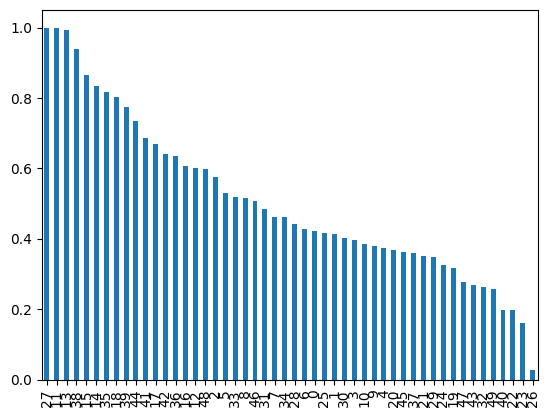

In [25]:
# How to visualize population
best_individual = population[idx_min]
string_representation = np.array2string(best_individual, separator=', ')
print(string_representation)
pd.Series(best_individual).sort_values(ascending=False).plot.bar()

In [26]:
vrptw.objective_func(population[idx_min])

291.1743654973095

In [27]:
exp.columns

Index(['action', 'reward', 'done', 'idx_iteration', 'F', 'CR', 'MG',
       'best_solution', 'convergence_rate', 'std_population',
       'total_iteration', 'best_trial_fitness', 'std_trial_fitness',
       'patience_remaining', 'F_sc', 'CR_sc', 'MG_sc', 'best_solution_sc',
       'std_population_sc', 'best_trial_fitness_sc', 'std_trial_fitness_sc',
       'patience_remaining_sc', 'TimeLimit.truncated'],
      dtype='object')

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

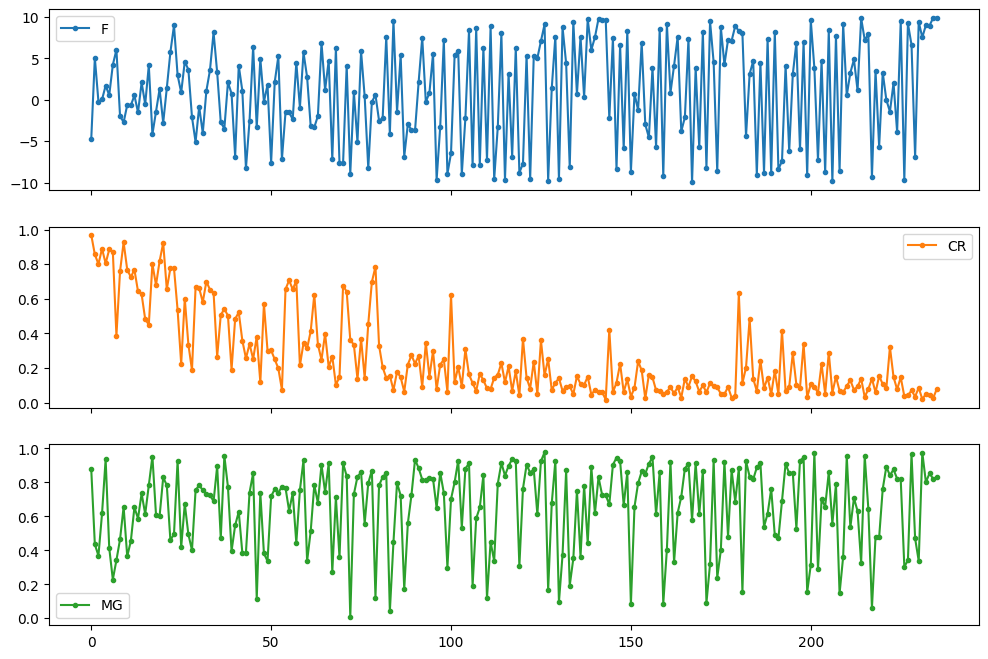

In [30]:
# Plot F, CR, MG over time in 3 subplots
exp[["F", "CR", "MG"]].plot(figsize=(12,8), marker=".", subplots=True)